# Pyplot tutorial

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

- plot()에 하나의 배열만 넣어주면 y축 값으로 인식하고 자동으로 x축값들 생성, 생성되는 값들은 인덱스 값(0~)


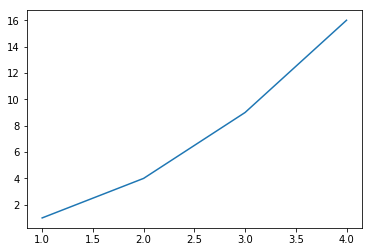

In [2]:
plt.plot([1,2,3,4],[1,4,9,16])

### Formatting the style of your plot

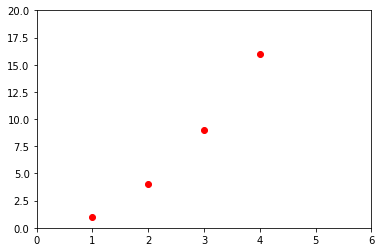

In [3]:
plt.plot([1,2,3,4],[1,4,9,16],'ro')
#plt.plot(x,y,format)
plt.axis([0,6,0,20])
#plt.axis([xmin,xmax,ymin,ymax])
plt.show()

In [4]:
plt.plot?
# see the plot() documetation for a complete list of line styles and format strings.

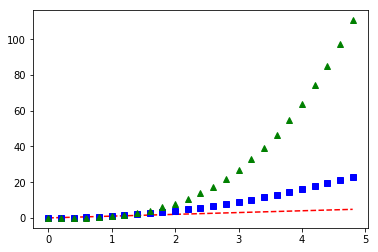

In [7]:
import numpy as np

# Illustrations of a plotting several lines with different format styles in one command using arrays
t = np.arange(0,5,0.2)

# red dashes, blue squares and green triangles
plt.plot(t,t,'r--',t,t**2,'bs',t,t**3,'g^')
plt.show()

#### Plotting with keyword strings

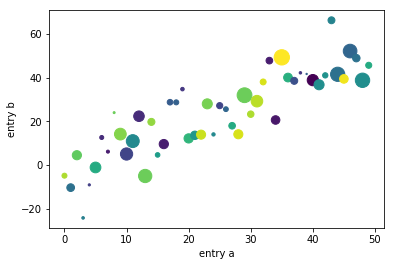

In [17]:
# There are some instances where you have data in a format that lets you access paricular variables with strigs
# Matplotlib allaws you provide such an object with the data keyword argument
# If provided, than you may generate plots with the strings corresponding to these variables

data = {'a':np.arange(50),
       'c':np.random.randint(0,50,50),
       'd':np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a','b',c='c',s='d',data= data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

#### Plotting with categorical variables
- It is also possible to create a plot using categorical variables.

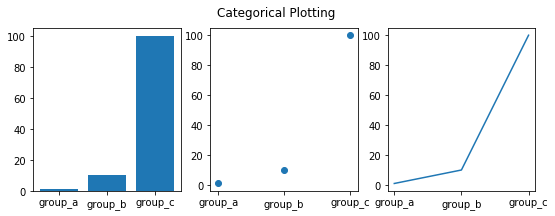

In [23]:
names = ['group_a','group_b','group_c']
values = [1, 10, 100]

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.bar(names,values)
plt.subplot(132)
plt.scatter(names,values)
plt.subplot(133)
plt.plot(names,values)
plt.suptitle('Categorical Plotting')
plt.show()

#### Controrlling line properties
- Lines have many attributes that you can set: linewidth, dash style.
antialiased,etc
- see [matplotlib.lines.Line2D](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)

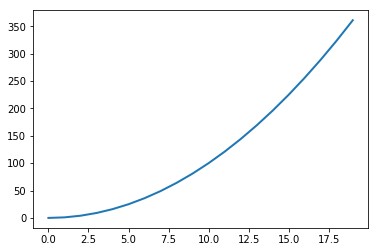

In [32]:
# use keword args
x = np.arange(20)
y = x**2
plt.plot(x,y,linewidth=2)
# plt.show()

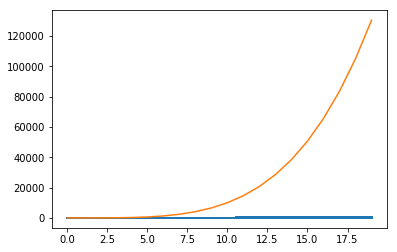

In [50]:
# Use the setter methods of a Line2D instance, plot returns a list of Line2D objects
line,line2 = plt.plot(x,y,x,y**2,'-')
line.set_antialiased(False)

[None, None, None, None]

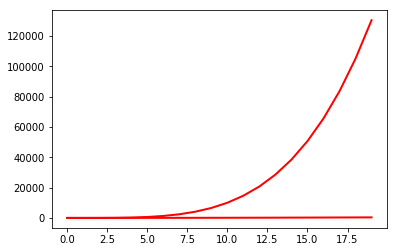

In [57]:
# Use the setp() command
# The example below uses a MATLAB - style command to set muliple properties on a list of lines.

lines = plt.plot(x,y,x,y**2)
# use keyword args
plt.setp(lines, color = 'r', linewidth=2)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r','linewidth',2)

#### Working with multiple figures and axes
- MATLAB, and pyplot have the concept of the current figure and the current axes
- All plotting commands apply to the current axes
- gca() : returns the current axes
- gcf() : returns the current figure
- 컴퓨터 내부적으로 이루어짐?

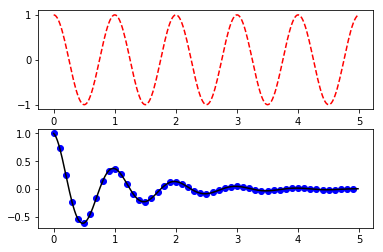

In [68]:
# script to create two subplots
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0,5,0.1)
t2 = np.arange(0,5,0.02)

plt.figure()
plt.subplot(212)
plt.plot(t1,f(t1),'bo',t2,f(t2),'k')

plt.subplot(211)
plt.plot(t2,np.cos(2*np.pi*t2),'r--')
plt.show()

- figure() command here is optional because figure(1) will be created by default
- subplot(111) will be created by default if you don't manually specify any axes

c:\users\stats\anaconda33\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Easy as 1, 2, 3')

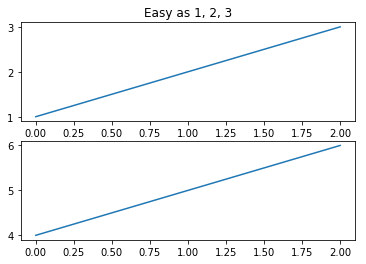

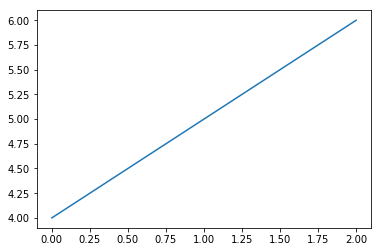

In [73]:
import matplotlib.pyplot as plt
plt.figure(1) # the first figure
plt.subplot(211) # the first subplot in the first figure
plt.plot([1,2,3]) 
plt.subplot(212) # the second subplot in the first figure
plt.plot([4,5,6])

plt.figure(2) # a second figure
plt.plot([4,5,6]) # creates a subplot(111) by default

plt.figure(1)  #figure 1 current; subplots(212) still current
plt.subplot(211) # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title



- 여러 개의 figure를 사용할 때 close() 명령어로 사용종료를 해줘야 figure를 가지고 있는 memory가 released 됨.

#### Working with text
- text() : 임의의 위치에 text를 추가할 수 있음
- xlable(),ylabel(),title()는 지정된 위치에 xlabel, ylable, title추가

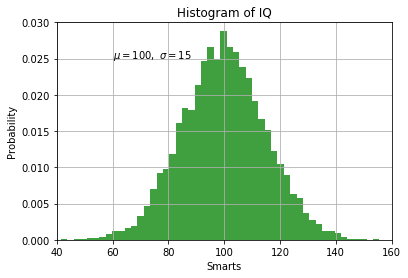

In [88]:
mu, sigma =100,15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50 ,density =1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60,.025,r'$\mu=100,\ \sigma=15$')
#plt.text(x,y,?)
plt.axis([40,160,0,0.03])
plt.grid(True)


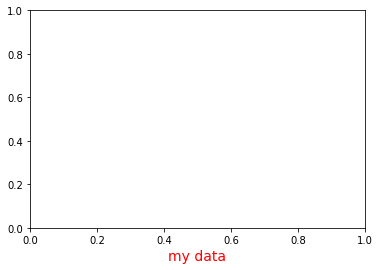

In [89]:
t = plt.xlabel('my data', fontsize=14, color='red')
# text()의 arguments를 조정하여 text의 속성을 바꿀 수 있음

Text(0.5,1,'$\\sigma_i=15$')

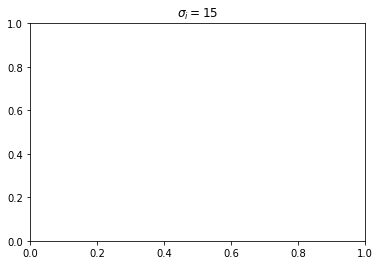

In [91]:
plt.title(r'$\sigma_i=15$')
# text expression에서 TeX equation 사용가능
# 

### Annotating text
- annotate() method는 annotations를 쉽게하기위한 기능을 제공함.

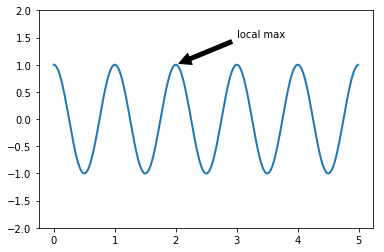

In [99]:
ax = plt.subplot(111)
t = np.arange(0, 5, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t,s,lw=2)

plt.annotate('local max', xy=(2,1), xytext=(3,1.5),
            arrowprops = dict(facecolor='black', shrink=0.05))
# plt.annotate(적을 글자, 표시할 위치, 포시할 텍스트의 위치, ...)
plt.ylim(-2,2)
plt.show()

- matplotlib.pyplot은 선형 스케일뿐만 아니라 로그 스케일도 지원함
- plt.xscale('log')

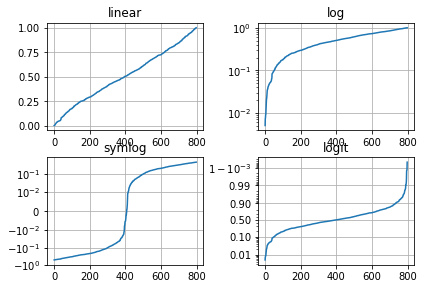

In [114]:
from matplotlib.ticker import NullFormatter # useful for 'Logit'sclae

#Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0,1[
y = np.random.normal(loc = 0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y<1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# Linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# Log
plt.subplot(222)
plt.plot(x,y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# Symmetric Log
plt.subplot(223)
plt.plot(x,y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# Logit
plt.subplot(224)
plt.plot(x,y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# format the minor tick labels of the y-axis into empty strings with
# 'nullformatter', to avoid cumbering the axis with too many labels
plt.gca().yaxis.set_minor_formatter(NullFormatter())
#Adjust the subplot layout, because the Logit one may take more space
# than usual, due to y-tick Labels Like "1 - 10^{-3}"
plt.subplots_adjust(top = 0.92, bottom=0.08, left=0.1, right = 0.95, hspace=0.25,
                   wspace=0.35)